1-dim example, to see if we can use reverse SDE to get the x0 again!

A t-x plot for trajectories is sufficient to go!

1. define forward. Do forward for 1000 times and draw xT-histogram.

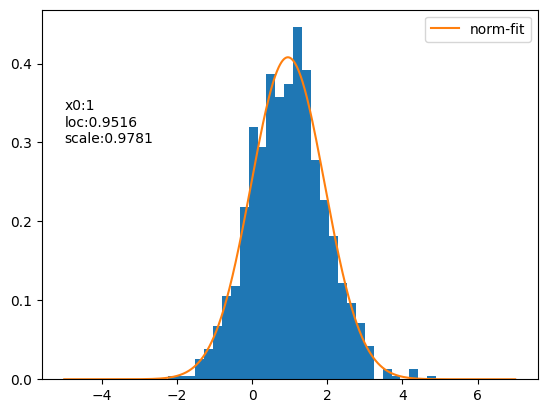

In [33]:
import numpy as np

def forward(x0, T, n):
    
    noise = np.random.randn(T, n, 1)
    x0 = np.ones((n,1))*x0

    x_states = []
    old_t=0/T
    x = x0
    for i in range(T):
        t = (i+1)/T
        x = x + np.sqrt(t-old_t)*noise[i] # (n,1)
        x_states.append(x) 
        old_t = t
    
    return x_states


x0 = 2

def run_1(x0):
    from matplotlib import pyplot as plt
    x_states = forward(x0, 1000, 1000)

    from scipy import stats
    xT= x_states[-1].flatten()
    loc, scale = stats.norm.fit(xT)
    plt.figure()
    plt.hist(xT, density=True, bins=30) 
    xx = np.linspace(-6+x0,x0+6,1000)
    plt.plot(xx, stats.norm.pdf(xx,loc,scale),label="norm-fit")
    plt.text(x0+-6,0.3,f"x0:{x0}\nloc:{loc:.4f}\nscale:{scale:.4f}")
    plt.legend()
    plt.show()

run_1(x0=1)


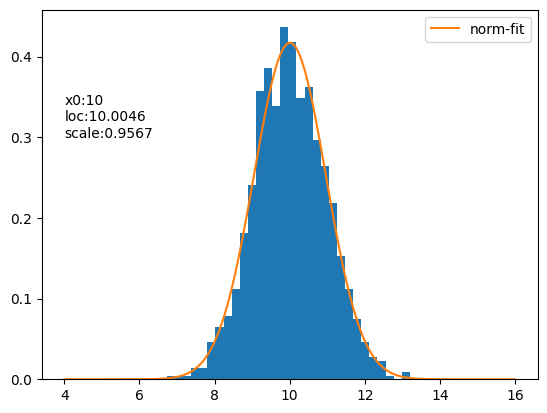

In [34]:
run_1(x0=10)

Forward: dX = dW, t in[0,1]

Transition:
$$
p(x,t|x',t') = \frac{1}{\sqrt{2 \pi (t-t')}}\exp\left(\frac{(x-x')^2}{-2(t-t')}\right),~ t>t'
$$ 
i.e.,
$$
x = x' + \sqrt{t-t'}\varepsilon,~ \varepsilon \sim\mathcal{N}(0,1)
$$

Backward:

$$


- x0: 1
min/max: 0.9668231729683435 1.0346654733348342


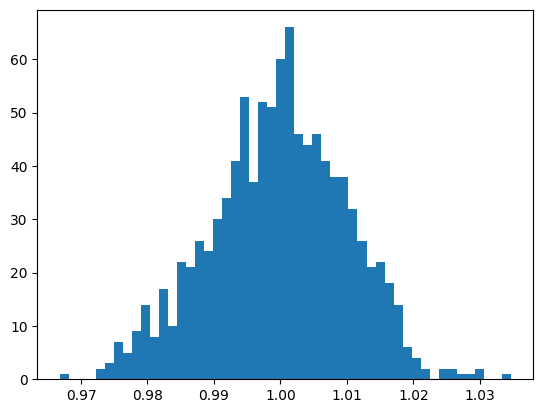

In [24]:


def backward(x0, T, n ):

    yT = np.random.randn(n,1)
    y_states = []

    y = yT
    old_t = 0/T
    for i in range(T):
        t = (i+1)/T # (1,...,T)/T
        # score_func_1
        sf=  -(y-x0)/(1-old_t)
        y += sf *(t-old_t) + np.sqrt(t-old_t)* np.random.randn(n,1) 
        y_states.append(y) 
        old_t=  t
    
    return y_states


from matplotlib import pyplot as plt
y_states = backward(x0, T=10000 , n=1000)

print(f"- x0: {x0}")
y0= y_states[-1].flatten()
print("min/max:",y0.min(),y0.max())
from scipy import stats
plt.figure()
plt.hist(y0, density=False, bins=50) 
plt.show()